# Development: Single Tunnel Passing Protocol in PIBT

In [1]:
import sys
sys.path.append('../')

sys.path.append('../../')
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt
from panav.environment.env import MultiTunnelEnv,DefaultEmtpyEnv
from panav.hybrid import HybridGraph

from panav.viz import draw_env

import shapely

from panav.ORCA import Ordered_Agent

%load_ext autoreload
%autoreload 2

%load_ext snakeviz

In [107]:

bloating_r = 0.5
vmax = 1.0


results = []

env_name = "MultiTunnel"

# Current algorithm runs quickly under this config
# N = 20
# limits = [(-15,15),(-15,15)] 
# n_tunnel = 4

# Current algorithm runs slowly under this config
N = 20
n_tunnel = 4


env = MultiTunnelEnv(n_tunnel = n_tunnel, tunnel_width = bloating_r*2.5, N_agent = N)

HG = HybridGraph(env,bloating_r)


/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


In [108]:
to_remove = []
for e in HG.edges:
    if HG.edges[e]['type']=='soft':
        # HG.edges[e]['weight'] = 0
        # pass
        u,v = e
        if HG.nodes[u]['type']== HG.nodes[v]['type']=='tunnel' and \
                                HG.nodes[u]['open_space_id'] == HG.nodes[v]['open_space_id']:
           to_remove.append(e) # Remove the soft edges connecting two tunnel endpoints for this particular environment
for e in to_remove:
    HG.remove_edge(*e)


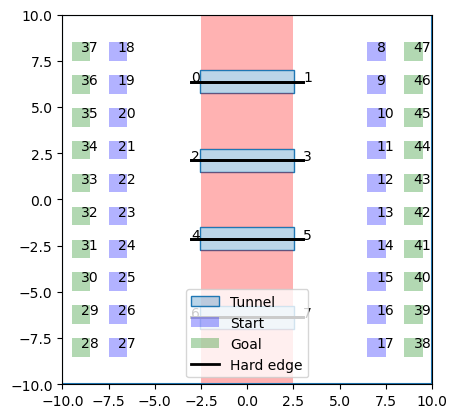

In [109]:
from panav.viz import draw_hybrid
draw_hybrid(HG)

In [110]:
from panav.PIBT import PIBT_plan
plans = PIBT_plan(HG,vmax,bloating_r,TIMEOUT=100,consider_entry=True)

/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/cvxpy/problems/problem.py:1391: UserWarning: 
    The problem is either infeasible or unbounded, but the solver
    cannot tell which. Disable any solver-specific presolve methods
    and re-solve to determine the precise problem status.

    For GUROBI and CPLEX you can automatically perform this re-solve
    with the keyword argument prob.solve(reoptimize=True, ...).
    
  warnings.warn(INF_OR_UNB_MESSAGE)


Potential deadlock
Potential deadlock
Potential deadlock
Potential deadlock


In [111]:
from panav.viz import animation
from IPython.display import HTML, display

exec_tau = 1.0

dt = exec_tau * 0.25
agents = range(len(plans))
pos_to_ani = [np.array(plans[a][1]) for a in agents]
anim = animation(env, pos_to_ani, bloating_r, dt = dt)
display(HTML(anim.to_jshtml()))
plt.close() 